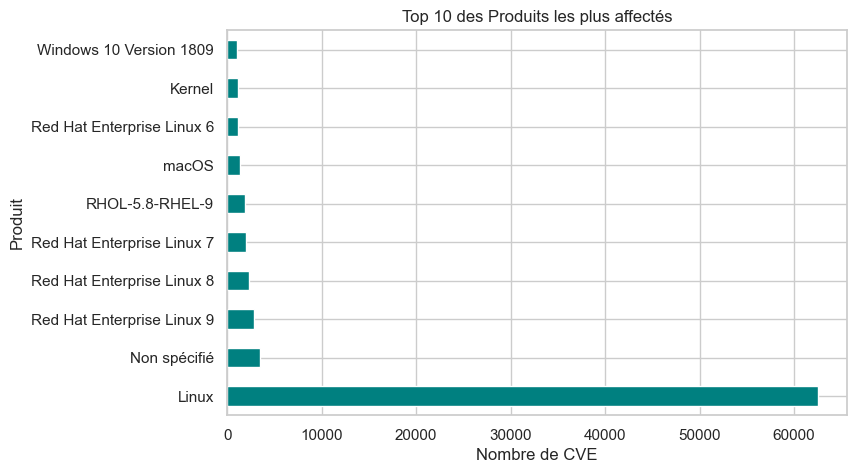

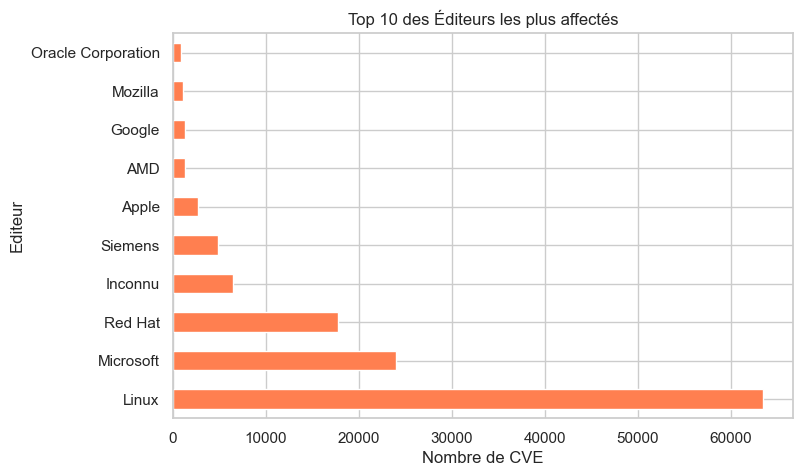

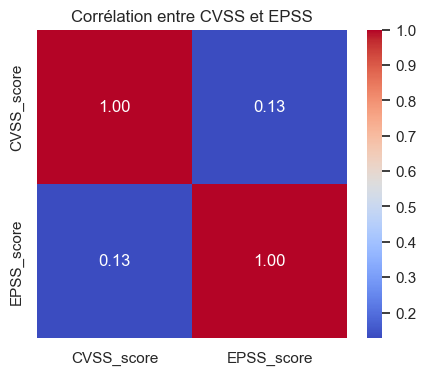

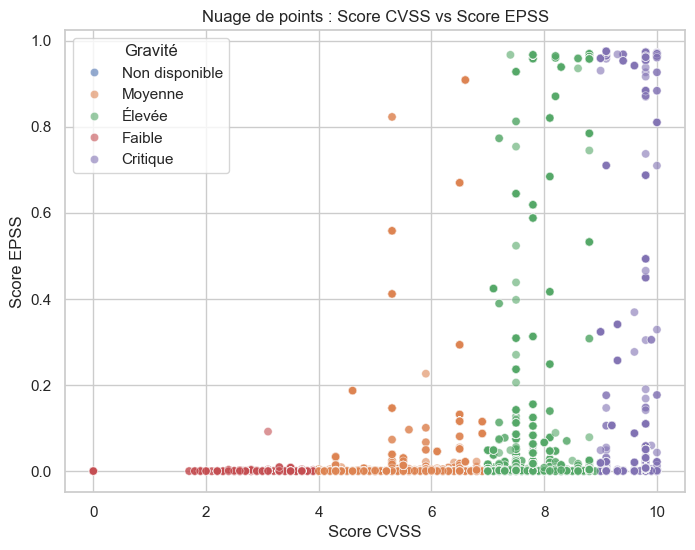

In [5]:
# Étape 5 – Visualisation et Interprétation des CVE enrichies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier CSV mis à jour
df = pd.read_csv("DataFrame.csv")

# Nettoyage de base
df['CVSS_score'] = pd.to_numeric(df['CVSS_score'], errors='coerce')
df['EPSS_score'] = pd.to_numeric(df['EPSS_score'], errors='coerce')
df['Date_publication'] = pd.to_datetime(df['Date_publication'], errors='coerce')
df['CWE'] = df['CWE'].fillna("Non classé")
df['Editeur'] = df['Editeur'].fillna("Inconnu")
df['Produit'] = df['Produit'].fillna("Non spécifié")

# Gravité CVSS

def score_to_severity(score):
    if pd.isna(score):
        return "Non disponible"
    elif score >= 9:
        return "Critique"
    elif score >= 7:
        return "Élevée"
    elif score >= 4:
        return "Moyenne"
    else:
        return "Faible"

df['Base_Severity'] = df['CVSS_score'].apply(score_to_severity)

# Classement des produits et éditeurs les plus affectés
plt.figure(figsize=(8,5))
df['Produit'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Top 10 des Produits les plus affectés")
plt.xlabel("Nombre de CVE")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
df['Editeur'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top 10 des Éditeurs les plus affectés")
plt.xlabel("Nombre de CVE")
plt.grid(True)
plt.show()

# Heatmap de corrélation CVSS / EPSS
plt.figure(figsize=(5,4))
sns.heatmap(df[['CVSS_score', 'EPSS_score']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre CVSS et EPSS")
plt.show()

# Nuage de points CVSS vs EPSS
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CVSS_score', y='EPSS_score', hue='Base_Severity', alpha=0.6)
plt.title("Nuage de points : Score CVSS vs Score EPSS")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.grid(True)
plt.legend(title='Gravité')
plt.show()

In [1]:
#import des librairies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pour un meilleur style de plot
sns.set(style="whitegrid")


#Chargement du fichier CSV 
df = pd.read_csv("DataFrame.csv", encoding="utf-8")

#Aperçu
df.head()


# Comptage des données manquantes au sens large
def compter_manquants(col):
    return ((col.isna()) | (col == "") | (col == "Non disponible")).sum()

# Application à chaque colonne
manquants = df.apply(compter_manquants)

# Affichage
print("Nombre de données manquantes par colonne (NaN, vide, ou 'Non disponible') :\n")
print(manquants.sort_values(ascending=False))

Nombre de données manquantes par colonne (NaN, vide, ou 'Non disponible') :

CVSS_score            95050
Base_Severity         95050
CWE                   76929
CWE_description       67944
Versions_affectees    29349
Editeur                6512
Produit                3526
EPSS_score              255
ID_ANSSI                  0
Titre_ANSSI               0
Type                      0
Date_publication          0
CVE_ID                    0
Lien_bulletin             0
Description               0
dtype: int64
